In [2]:


import geopandas as gpd
import pandas as pd # 导入pandas库
import numpy as np  # 导入numpy库

In [3]:
use_types = ['汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务', '体育休闲服务',
           '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务', '交通设施服务',
           '金融保险服务', '公司企业',]

# test for the poi

In [4]:
poi_name = use_types[0]

poi = gpd.read_file('./data/POI/use_poi/poi_shp/2018_{}.shp'.format(poi_name))

In [5]:
poi

,name,geometry
0,国家电网汽车充电站(上海新城),POINT (121.57616 31.12436)
1,轻侯新能源汽车充电站(慈桥路),POINT (121.61435 31.14527)
2,比亚迪汽车充电站(金亭公路),POINT (121.76468 31.11387)
3,依威能源汽车充电站(金达花园),POINT (121.57596 31.26055)
4,特来电汽车充电站(上海星汇广场),POINT (121.50103 31.32218)
...,...,...
22378,路驰汽车美容养护中心,POINT (121.71831 31.05130)
22379,建大轮胎(老应专卖店),POINT (121.84733 31.03097)
22380,上海领羡汽车服务有限公司,POINT (121.42620 31.38067)
22381,天能电池,POINT (121.65609 31.19156)


In [6]:
poi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84x.shp')

In [8]:
region

,TownName,geometry
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339..."
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347..."
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334..."
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329..."
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395..."
...,...,...
112,东明路街道,"POLYGON ((121.52901 31.14664, 121.53207 31.140..."
113,梅陇镇,"POLYGON ((121.45089 31.10274, 121.45038 31.102..."
114,虹梅路街道,"POLYGON ((121.41066 31.18544, 121.41047 31.184..."
115,金桥镇,"MULTIPOLYGON (((121.63341 31.26208, 121.63443 ..."


In [9]:
df_poi = gpd.sjoin(region,poi,op='contains')

In [10]:
df_poi

,TownName,geometry,index_right,name
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",20034,安悦充电汽车充电站(上海开放大学站)
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",22296,上海崭然建筑材料有限公司
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",9698,优玛膜授权施工中心
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",16625,美国龙膜授权施工中心
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",3929,延旺汽车装潢服务有限公司
...,...,...,...,...
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",19236,浦东新区高桥社会组织服务中心
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",11688,静通汽车
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",5524,安悦充电汽车充电站(东华金融中心)
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",3540,普天新能源汽车充电站(上海自贸区管委会)


In [11]:
df_poi.groupby(by='TownName').count()[['name']].rename(columns={'name':poi_name})

,汽车服务
TownName,
七宝镇,512
三林镇,308
上钢新村街道,65
东明路街道,37
临汾路街道,71
...,...
高东镇,67
高境镇,129
高桥镇,334


# 定义函数，对17个POI执行处理

In [12]:
def concat(poi_name):
    poi = gpd.read_file('./data/POI/use_poi/poi_shp/2018_{}.shp'.format(poi_name))
    df_poi = gpd.sjoin(region,poi,op='contains')
    df_poi = df_poi.groupby(by='TownName').count()[['name']].rename(columns={'name':poi_name})
    return df_poi

In [13]:
poi_all = pd.concat([concat(poi_name) for poi_name in use_types],axis=1)

In [14]:
poi_all

,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业
TownName,,,,,,,,,,,,,,,,,
七宝镇,512,120.0,138.0,35.0,2765,7333,2583,523,282,199,94.0,1221,288,650,993,261,3478
三林镇,308,18.0,147.0,40.0,2392,6854,2467,445,320,244,47.0,645,288,549,878,244,2514
上钢新村街道,65,17.0,13.0,4.0,589,1185,646,129,90,63,25.0,170,177,214,266,89,457
东明路街道,37,1.0,16.0,9.0,805,1548,840,132,144,59,9.0,282,137,138,258,81,220
临汾路街道,71,10.0,21.0,4.0,305,723,481,66,84,27,9.0,191,106,95,97,69,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
高东镇,67,4.0,41.0,10.0,581,847,797,122,55,40,14.0,221,202,101,270,55,617
高境镇,129,71.0,72.0,7.0,1403,2133,1125,266,118,89,9.0,389,145,261,302,126,1209
高桥镇,334,23.0,151.0,23.0,1351,2560,1842,235,200,108,84.0,716,294,318,480,131,1216


In [15]:
poi_all.isnull().sum()

汽车服务          0
汽车销售          4
汽车维修          2
摩托车服务        18
餐饮服务          0
购物服务          0
生活服务          0
体育休闲服务        0
医疗保健服务        0
住宿服务          0
风景名胜          1
商务住宅          0
政府机构及社会团体     0
科教文化服务        0
交通设施服务        0
金融保险服务        0
公司企业          0
dtype: int64

In [16]:
poi_all = poi_all.fillna(0)

In [17]:
poi_all.columns

Index(['汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务', '体育休闲服务',
       '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务', '交通设施服务',
       '金融保险服务', '公司企业'],
      dtype='object')

# 计算比例

In [18]:
cols = poi_all.columns[:]

poi_all['count'] = 0
for i in cols:
    poi_all['count'] = poi_all[i] + poi_all['count']

In [19]:
for i in poi_all.columns[:-1]:
    poi_all[i] = poi_all[i] / poi_all['count']

In [20]:
poi_all.head()

,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业,count
TownName,,,,,,,,,,,,,,,,,,
七宝镇,0.023842,0.005588,0.006426,0.001630,0.128754,0.341467,0.120279,0.024354,0.013132,0.009267,0.004377,0.056857,0.013411,0.030268,0.046240,0.012154,0.161956,21475.0
三林镇,0.016739,0.000978,0.007989,0.002174,0.130000,0.372500,0.134076,0.024185,0.017391,0.013261,0.002554,0.035054,0.015652,0.029837,0.047717,0.013261,0.136630,18400.0
上钢新村街道,0.015480,0.004049,0.003096,0.000953,0.140271,0.282210,0.153846,0.030722,0.021434,0.015004,0.005954,0.040486,0.042153,0.050965,0.063348,0.021196,0.108835,4199.0
东明路街道,0.007846,0.000212,0.003393,0.001908,0.170696,0.328244,0.178117,0.027990,0.030534,0.012511,0.001908,0.059796,0.029050,0.029262,0.054707,0.017176,0.046650,4716.0
临汾路街道,0.028411,0.004002,0.008403,0.001601,0.122049,0.289316,0.192477,0.026411,0.033613,0.010804,0.003601,0.076431,0.042417,0.038015,0.038816,0.027611,0.056022,2499.0


In [21]:
poi_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 七宝镇 to 龙华街道
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   汽车服务       117 non-null    float64
 1   汽车销售       117 non-null    float64
 2   汽车维修       117 non-null    float64
 3   摩托车服务      117 non-null    float64
 4   餐饮服务       117 non-null    float64
 5   购物服务       117 non-null    float64
 6   生活服务       117 non-null    float64
 7   体育休闲服务     117 non-null    float64
 8   医疗保健服务     117 non-null    float64
 9   住宿服务       117 non-null    float64
 10  风景名胜       117 non-null    float64
 11  商务住宅       117 non-null    float64
 12  政府机构及社会团体  117 non-null    float64
 13  科教文化服务     117 non-null    float64
 14  交通设施服务     117 non-null    float64
 15  金融保险服务     117 non-null    float64
 16  公司企业       117 non-null    float64
 17  count      117 non-null    float64
dtypes: float64(18)
memory usage: 17.4+ KB


In [22]:
df = poi_all

In [23]:
df = df.reset_index()

In [24]:
df.head()

,TownName,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业,count
0,七宝镇,0.023842,0.005588,0.006426,0.001630,0.128754,0.341467,0.120279,0.024354,0.013132,0.009267,0.004377,0.056857,0.013411,0.030268,0.046240,0.012154,0.161956,21475.0
1,三林镇,0.016739,0.000978,0.007989,0.002174,0.130000,0.372500,0.134076,0.024185,0.017391,0.013261,0.002554,0.035054,0.015652,0.029837,0.047717,0.013261,0.136630,18400.0
2,上钢新村街道,0.015480,0.004049,0.003096,0.000953,0.140271,0.282210,0.153846,0.030722,0.021434,0.015004,0.005954,0.040486,0.042153,0.050965,0.063348,0.021196,0.108835,4199.0
3,东明路街道,0.007846,0.000212,0.003393,0.001908,0.170696,0.328244,0.178117,0.027990,0.030534,0.012511,0.001908,0.059796,0.029050,0.029262,0.054707,0.017176,0.046650,4716.0
4,临汾路街道,0.028411,0.004002,0.008403,0.001601,0.122049,0.289316,0.192477,0.026411,0.033613,0.010804,0.003601,0.076431,0.042417,0.038015,0.038816,0.027611,0.056022,2499.0


In [25]:
df.to_csv('./data/factors/vls_poi1.csv',index=False)

# 读取数据

In [26]:
bus = gpd.read_file('./data/shpData/basic_shp/上海_站点.shp')

In [27]:
subway = gpd.read_file('./data/shpData/basic_shp/sh_metro_sts.shp')

In [28]:
region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84x.shp')

<AxesSubplot:>

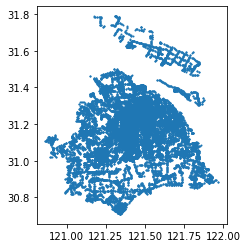

In [29]:
bus.plot(markersize=1)

In [30]:
len(bus)

41977

In [31]:
len(subway)

403

<AxesSubplot:>

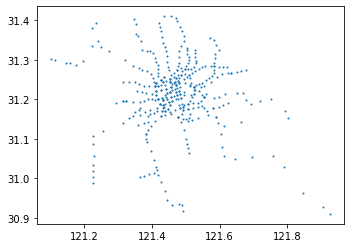

In [32]:
subway.plot(markersize=1)

In [33]:
region.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
bus = bus.to_crs(epsg=3857)
subway = subway.to_crs(epsg=3857)
region = region.to_crs(epsg=3857)

In [35]:
region['area'] = region['geometry'].area

In [36]:
region

,TownName,geometry,area
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",4.328821e+07
1,顾村镇,"POLYGON ((13518001.074 3677985.377, 13517914.9...",5.736571e+07
2,高境镇,"POLYGON ((13524702.842 3676907.356, 13524319.7...",9.732711e+06
3,张庙街道,"POLYGON ((13520795.803 3675632.292, 13520620.7...",6.536191e+06
4,杨行镇,"POLYGON ((13522066.173 3684220.535, 13522101.0...",5.425333e+07
...,...,...,...
112,东明路街道,"POLYGON ((13528547.832 3651808.312, 13528888.2...",6.761853e+06
113,梅陇镇,"POLYGON ((13519851.391 3646099.343, 13519794.6...",3.907969e+07
114,虹梅路街道,"POLYGON ((13515372.852 3656855.890, 13515352.0...",6.007612e+06
115,金桥镇,"MULTIPOLYGON (((13540169.175 3666832.488, 1354...",1.742489e+07


In [37]:
bus.head()

,name,geometry
0,上海西站,POINT (13514054.475 3667065.054)
1,曹杨路芝川路,POINT (13514137.207 3666876.048)
2,曹杨路铜川路,POINT (13514336.891 3666126.308)
3,铜川路曹杨路,POINT (13514747.707 3665679.061)
4,武宁新村,POINT (13516117.386 3664116.930)


# 按照半径做缓冲

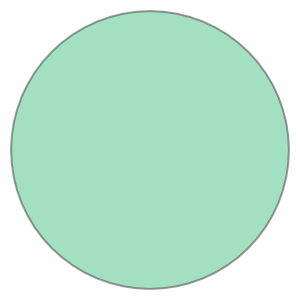

In [38]:
bus['geometry'][0].buffer(158)

In [39]:
bus['geometry'] = bus['geometry'].apply(lambda x:x.buffer(158))

In [40]:
bus.head()

,name,geometry
0,上海西站,"POLYGON ((13514212.475 3667065.054, 13514211.7..."
1,曹杨路芝川路,"POLYGON ((13514295.207 3666876.048, 13514294.4..."
2,曹杨路铜川路,"POLYGON ((13514494.891 3666126.308, 13514494.1..."
3,铜川路曹杨路,"POLYGON ((13514905.707 3665679.061, 13514904.9..."
4,武宁新村,"POLYGON ((13516275.386 3664116.930, 13516274.6..."


In [41]:
subway['geometry'] = subway['geometry'].apply(lambda x:x.buffer(1025))

In [42]:
subway.head()

,ST_NAME,line,geometry
0,10号线虹桥火车站,10号,"POLYGON ((13505681.223 3658223.094, 13505676.2..."
1,10号线五角场,10号,"POLYGON ((13527483.883 3671781.399, 13527478.9..."
2,10号线海伦路,10号,"POLYGON ((13524586.813 3666727.377, 13524581.8..."
3,4号线海伦路,4号,"POLYGON ((13524586.813 3666727.377, 13524581.8..."
4,8号线西藏北路,8号,"POLYGON ((13522360.938 3667267.079, 13522356.0..."


# 面几何的合并

In [43]:
type(subway['geometry'].unary_union)

shapely.geometry.multipolygon.MultiPolygon

In [44]:
subway_inf = gpd.GeoDataFrame({'geometry':[subway['geometry'].unary_union]},crs='epsg:3857')
bus_inf = gpd.GeoDataFrame({'geometry':[bus['geometry'].unary_union]},crs='epsg:3857')

# 公交站点影响范围

In [45]:
region.head()

,TownName,geometry,area
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",4.328821e+07
1,顾村镇,"POLYGON ((13518001.074 3677985.377, 13517914.9...",5.736571e+07
2,高境镇,"POLYGON ((13524702.842 3676907.356, 13524319.7...",9.732711e+06
3,张庙街道,"POLYGON ((13520795.803 3675632.292, 13520620.7...",6.536191e+06
4,杨行镇,"POLYGON ((13522066.173 3684220.535, 13522101.0...",5.425333e+07


In [46]:
busx = gpd.overlay(region,bus_inf,how='intersection')

<AxesSubplot:>

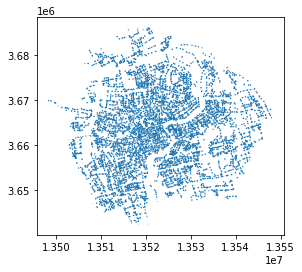

In [47]:
busx.plot()

In [48]:
busx['bus_area'] = busx['geometry'].area

In [49]:
busx.head()

,TownName,area,geometry,bus_area
0,大场镇,4.328821e+07,"MULTIPOLYGON (((13514896.745 3668588.432, 1351...",9.728687e+06
1,顾村镇,5.736571e+07,"MULTIPOLYGON (((13517701.644 3677577.127, 1351...",7.765208e+06
2,高境镇,9.732711e+06,"MULTIPOLYGON (((13522938.028 3673984.831, 1352...",3.706166e+06
3,张庙街道,6.536191e+06,"MULTIPOLYGON (((13519126.742 3675206.251, 1351...",2.758026e+06
4,杨行镇,5.425333e+07,"MULTIPOLYGON (((13517536.533 3678668.072, 1351...",8.151053e+06


# 地铁站点影响范围

In [50]:
subwayx = gpd.overlay(region,subway_inf,how='intersection')

<AxesSubplot:>

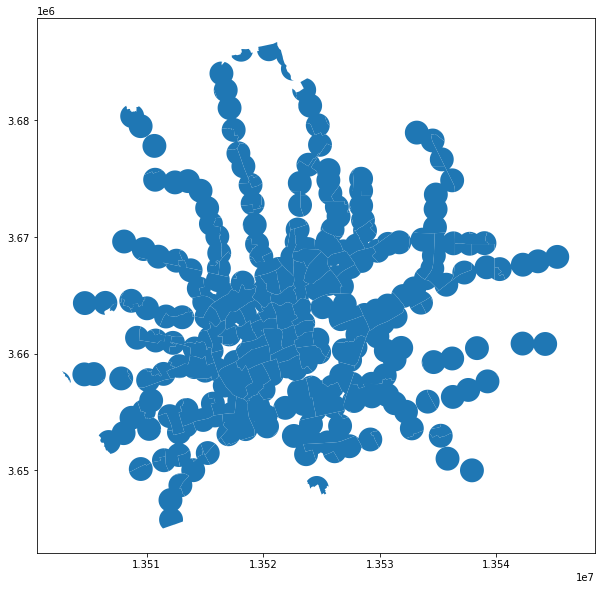

In [51]:
subwayx.plot(figsize=(10,10))

In [52]:
subwayx['subway_area'] = subwayx['geometry'].area

In [53]:
subwayx

,TownName,area,geometry,subway_area
0,大场镇,4.328821e+07,"POLYGON ((13516323.387 3671675.879, 13516248.1...",1.843684e+07
1,顾村镇,5.736571e+07,"MULTIPOLYGON (((13510966.193 3675577.496, 1351...",1.043949e+07
2,高境镇,9.732711e+06,"MULTIPOLYGON (((13519897.558 3674640.949, 1351...",5.433106e+06
3,张庙街道,6.536191e+06,"POLYGON ((13519456.855 3675248.890, 13519471.0...",2.600412e+06
4,杨行镇,5.425333e+07,"MULTIPOLYGON (((13518193.419 3678036.048, 1351...",1.568676e+07
...,...,...,...,...
110,东明路街道,6.761853e+06,"POLYGON ((13526401.180 3650981.773, 13526132.1...",5.685468e+06
111,梅陇镇,3.907969e+07,"POLYGON ((13513169.169 3647962.525, 13513119.1...",5.428898e+06
112,虹梅路街道,6.007612e+06,"POLYGON ((13515278.903 3656510.243, 13515296.4...",5.139472e+06
113,金桥镇,1.742489e+07,"MULTIPOLYGON (((13534510.114 3664672.066, 1353...",3.533211e+06


In [54]:
busx

,TownName,area,geometry,bus_area
0,大场镇,4.328821e+07,"MULTIPOLYGON (((13514896.745 3668588.432, 1351...",9.728687e+06
1,顾村镇,5.736571e+07,"MULTIPOLYGON (((13517701.644 3677577.127, 1351...",7.765208e+06
2,高境镇,9.732711e+06,"MULTIPOLYGON (((13522938.028 3673984.831, 1352...",3.706166e+06
3,张庙街道,6.536191e+06,"MULTIPOLYGON (((13519126.742 3675206.251, 1351...",2.758026e+06
4,杨行镇,5.425333e+07,"MULTIPOLYGON (((13517536.533 3678668.072, 1351...",8.151053e+06
...,...,...,...,...
112,东明路街道,6.761853e+06,"MULTIPOLYGON (((13524808.465 3651120.491, 1352...",3.442240e+06
113,梅陇镇,3.907969e+07,"MULTIPOLYGON (((13518385.251 3642313.027, 1351...",1.004878e+07
114,虹梅路街道,6.007612e+06,"MULTIPOLYGON (((13513205.764 3653849.977, 1351...",3.417201e+06
115,金桥镇,1.742489e+07,"MULTIPOLYGON (((13536538.916 3661565.197, 1353...",3.276307e+06


In [55]:
bus_subway = pd.merge(busx[['TownName','bus_area']],subwayx[['TownName','subway_area']],on='TownName',how='left')

In [56]:
bus_subway = bus_subway.fillna(0)

In [57]:
df = region.merge(bus_subway,on='TownName')

In [58]:
df.head()

,TownName,geometry,area,bus_area,subway_area
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",4.328821e+07,9.728687e+06,1.843684e+07
1,顾村镇,"POLYGON ((13518001.074 3677985.377, 13517914.9...",5.736571e+07,7.765208e+06,1.043949e+07
2,高境镇,"POLYGON ((13524702.842 3676907.356, 13524319.7...",9.732711e+06,3.706166e+06,5.433106e+06
3,张庙街道,"POLYGON ((13520795.803 3675632.292, 13520620.7...",6.536191e+06,2.758026e+06,2.600412e+06
4,杨行镇,"POLYGON ((13522066.173 3684220.535, 13522101.0...",5.425333e+07,8.151053e+06,1.568676e+07


In [59]:
df['area'] = df['geometry'].area

In [60]:
df['ARBus'] = df['bus_area'] / df['area']
df['ARSubway'] = df['subway_area'] / df['area']

In [61]:
df.head()

,TownName,geometry,area,bus_area,subway_area,ARBus,ARSubway
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",4.328821e+07,9.728687e+06,1.843684e+07,0.224742,0.425909
1,顾村镇,"POLYGON ((13518001.074 3677985.377, 13517914.9...",5.736571e+07,7.765208e+06,1.043949e+07,0.135363,0.181981
2,高境镇,"POLYGON ((13524702.842 3676907.356, 13524319.7...",9.732711e+06,3.706166e+06,5.433106e+06,0.380795,0.558232
3,张庙街道,"POLYGON ((13520795.803 3675632.292, 13520620.7...",6.536191e+06,2.758026e+06,2.600412e+06,0.421962,0.397848
4,杨行镇,"POLYGON ((13522066.173 3684220.535, 13522101.0...",5.425333e+07,8.151053e+06,1.568676e+07,0.150241,0.289139


<AxesSubplot:>

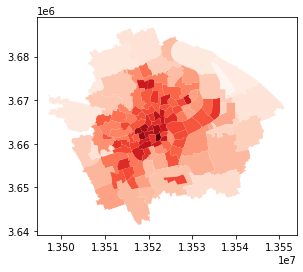

In [62]:
df.plot(column='ARBus',cmap='Reds')

<AxesSubplot:>

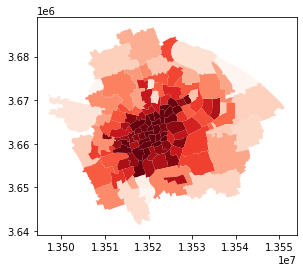

In [63]:
df.plot(column='ARSubway',cmap='Reds')

In [64]:
df.head(1)

,TownName,geometry,area,bus_area,subway_area,ARBus,ARSubway
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",4.328821e+07,9.728687e+06,1.843684e+07,0.224742,0.425909


In [65]:
df.columns

Index(['TownName', 'geometry', 'area', 'bus_area', 'subway_area', 'ARBus',
       'ARSubway'],
      dtype='object')

In [66]:
df[['TownName', 'geometry','ARBus', 'ARSubway']].to_file('./data/factors/vls_bus_subway.shp',encoding='utf-8')

# ols 读取数据

In [329]:
poi = pd.read_csv('./data/factors/vls_poi1.csv')

In [330]:
poi.head(1)

,TownName,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业,count
0,七宝镇,0.0238,0.0056,0.0064,0.0016,0.1288,0.3415,0.1203,0.0244,0.0131,0.0093,0.0044,0.0569,0.0134,0.0303,0.0462,0.0122,0.1620,"21,475.0000"


In [331]:
poi.columns

Index(['TownName', '汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务',
       '体育休闲服务', '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务',
       '交通设施服务', '金融保险服务', '公司企业', 'count'],
      dtype='object')

In [332]:
poi.head(1)

,TownName,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业,count
0,七宝镇,0.0238,0.0056,0.0064,0.0016,0.1288,0.3415,0.1203,0.0244,0.0131,0.0093,0.0044,0.0569,0.0134,0.0303,0.0462,0.0122,0.1620,"21,475.0000"


In [333]:
poi.rename(columns={"index":"TownName"},inplace=True)

In [334]:
poi

,TownName,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业,count
0,七宝镇,0.0238,0.0056,0.0064,0.0016,0.1288,0.3415,0.1203,0.0244,0.0131,0.0093,0.0044,0.0569,0.0134,0.0303,0.0462,0.0122,0.1620,"21,475.0000"
1,三林镇,0.0167,0.0010,0.0080,0.0022,0.1300,0.3725,0.1341,0.0242,0.0174,0.0133,0.0026,0.0351,0.0157,0.0298,0.0477,0.0133,0.1366,"18,400.0000"
2,上钢新村街道,0.0155,0.0040,0.0031,0.0010,0.1403,0.2822,0.1538,0.0307,0.0214,0.0150,0.0060,0.0405,0.0422,0.0510,0.0633,0.0212,0.1088,"4,199.0000"
3,东明路街道,0.0078,0.0002,0.0034,0.0019,0.1707,0.3282,0.1781,0.0280,0.0305,0.0125,0.0019,0.0598,0.0291,0.0293,0.0547,0.0172,0.0466,"4,716.0000"
4,临汾路街道,0.0284,0.0040,0.0084,0.0016,0.1220,0.2893,0.1925,0.0264,0.0336,0.0108,0.0036,0.0764,0.0424,0.0380,0.0388,0.0276,0.0560,"2,499.0000"
5,五角场街道,0.0065,0.0011,0.0011,0.0002,0.1508,0.2617,0.1260,0.0337,0.0165,0.0122,0.0015,0.0422,0.0175,0.0796,0.0705,0.0235,0.1554,"16,036.0000"
6,五角场镇,0.0257,0.0056,0.0084,0.0011,0.1419,0.2342,0.1568,0.0387,0.0301,0.0143,0.0037,0.0423,0.0277,0.0483,0.0612,0.0205,0.1394,"8,808.0000"
7,五里桥街道,0.0059,0.0002,0.0004,0.0004,0.1184,0.1908,0.1486,0.0275,0.0217,0.0136,0.0022,0.0515,0.0346,0.0468,0.0621,0.0338,0.2415,"5,382.0000"
8,仙霞新村街道,0.0052,0.0006,0.0012,0.0004,0.1638,0.2253,0.1655,0.0474,0.0162,0.0119,0.0019,0.0439,0.0358,0.0486,0.0630,0.0266,0.1426,"5,189.0000"
9,共和新路街道,0.0080,0.0006,0.0027,0.0009,0.1325,0.2520,0.1464,0.0252,0.0130,0.0216,0.0017,0.0487,0.0279,0.0376,0.0683,0.0163,0.1967,"6,386.0000"


In [335]:
poi.drop([ '汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务',
       '体育休闲服务', '住宿服务', '风景名胜', '科教文化服务',
       '交通设施服务', '公司企业', 'count','金融保险服务','政府机构及社会团体',],axis=1,inplace=True)

In [336]:
bus_subway = gpd.read_file('./data/factors/vls_bus_subway.shp')

In [337]:
bus_subway

,TownName,ARBus,ARSubway,geometry
0,大场镇,0.2247,0.4259,"POLYGON ((13514210.924 3677030.234, 13514205.0..."
1,顾村镇,0.1354,0.1820,"POLYGON ((13518001.074 3677985.377, 13517914.9..."
2,高境镇,0.3808,0.5582,"POLYGON ((13524702.842 3676907.356, 13524319.7..."
3,张庙街道,0.4220,0.3978,"POLYGON ((13520795.803 3675632.292, 13520620.7..."
4,杨行镇,0.1502,0.2891,"POLYGON ((13522066.173 3684220.535, 13522101.0..."
5,庙行镇,0.3502,0.3535,"POLYGON ((13518715.866 3675032.580, 13518809.1..."
6,淞南镇,0.2045,0.2112,"POLYGON ((13525928.460 3679272.213, 13526157.5..."
7,宝山城市工业园区,0.1206,0.0000,"POLYGON ((13509566.413 3672397.059, 13509430.9..."
8,吴淞街道,0.2501,0.5927,"POLYGON ((13526229.182 3684386.250, 13526213.9..."
9,嘉兴路街道,0.4808,1.0000,"POLYGON ((13525549.949 3668196.244, 13525545.5..."


In [338]:
df = bus_subway.merge(poi,on='TownName')

In [339]:
vars_use = df.copy()

# 读取SDR，做连接

In [340]:
tob = pd.read_csv(r'./data/OD/SDR.csv')

In [341]:
tob = tob.drop_duplicates()

In [342]:
tob

,TownName,TOB_MINU
0,大场镇,18.6167
1,顾村镇,37.7500
2,高境镇,18.7167
3,张庙街道,23.9000
4,杨行镇,33.5833
5,庙行镇,22.5333
6,淞南镇,25.8333
7,宝山城市工业园区,51.2833
8,吴淞街道,27.4333
9,嘉兴路街道,15.7500


In [343]:
df_analysis = vars_use.merge(tob,on='TownName')

In [344]:
df_analysis

,TownName,ARBus,ARSubway,geometry,生活服务,医疗保健服务,商务住宅,TOB_MINU
0,大场镇,0.2247,0.4259,"POLYGON ((13514210.924 3677030.234, 13514205.0...",0.1416,0.0158,0.0457,18.6167
1,顾村镇,0.1354,0.1820,"POLYGON ((13518001.074 3677985.377, 13517914.9...",0.1681,0.0159,0.0323,37.7500
2,高境镇,0.3808,0.5582,"POLYGON ((13524702.842 3676907.356, 13524319.7...",0.1432,0.0150,0.0495,18.7167
3,张庙街道,0.4220,0.3978,"POLYGON ((13520795.803 3675632.292, 13520620.7...",0.1811,0.0261,0.0382,23.9000
4,杨行镇,0.1502,0.2891,"POLYGON ((13522066.173 3684220.535, 13522101.0...",0.1343,0.0084,0.0243,33.5833
5,庙行镇,0.3502,0.3535,"POLYGON ((13518715.866 3675032.580, 13518809.1...",0.1517,0.0150,0.0386,22.5333
6,淞南镇,0.2045,0.2112,"POLYGON ((13525928.460 3679272.213, 13526157.5...",0.1293,0.0112,0.0276,25.8333
7,宝山城市工业园区,0.1206,0.0000,"POLYGON ((13509566.413 3672397.059, 13509430.9...",0.2522,0.0079,0.0252,51.2833
8,吴淞街道,0.2501,0.5927,"POLYGON ((13526229.182 3684386.250, 13526213.9...",0.1537,0.0250,0.0568,27.4333
9,嘉兴路街道,0.4808,1.0000,"POLYGON ((13525549.949 3668196.244, 13525545.5...",0.1937,0.0172,0.0496,15.7500


In [345]:
df_analysis.drop(['TownName','geometry'],axis=1,inplace=True)

In [346]:
df_analysis.drop([112,66,78,53],axis=0,inplace=True)

In [347]:
df_analysis.columns

Index(['ARBus', 'ARSubway', '生活服务', '医疗保健服务', '商务住宅', 'TOB_MINU'], dtype='object')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/matplotlib/backends/backend_

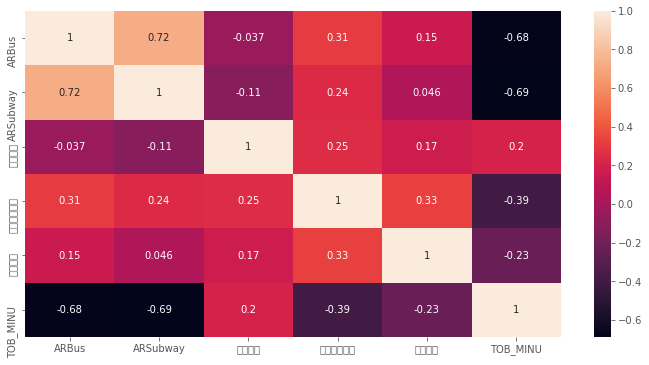

In [348]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,6))

sns.heatmap(df_analysis.corr(),annot = True)
plt.show()

In [349]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [350]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [351]:
df_analysis.columns

Index(['ARBus', 'ARSubway', '生活服务', '医疗保健服务', '商务住宅', 'TOB_MINU'], dtype='object')

In [352]:
df_analysis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 113 entries, 0 to 116
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ARBus     113 non-null    float64
 1   ARSubway  113 non-null    float64
 2   生活服务      113 non-null    float64
 3   医疗保健服务    113 non-null    float64
 4   商务住宅      113 non-null    float64
 5   TOB_MINU  113 non-null    float64
dtypes: float64(6)
memory usage: 6.2 KB


In [353]:
df_analysis

,ARBus,ARSubway,生活服务,医疗保健服务,商务住宅,TOB_MINU
0,0.2247,0.4259,0.1416,0.0158,0.0457,18.6167
1,0.1354,0.1820,0.1681,0.0159,0.0323,37.7500
2,0.3808,0.5582,0.1432,0.0150,0.0495,18.7167
3,0.4220,0.3978,0.1811,0.0261,0.0382,23.9000
4,0.1502,0.2891,0.1343,0.0084,0.0243,33.5833
5,0.3502,0.3535,0.1517,0.0150,0.0386,22.5333
6,0.2045,0.2112,0.1293,0.0112,0.0276,25.8333
7,0.1206,0.0000,0.2522,0.0079,0.0252,51.2833
8,0.2501,0.5927,0.1537,0.0250,0.0568,27.4333
9,0.4808,1.0000,0.1937,0.0172,0.0496,15.7500


In [354]:
df_analysis.isna().sum()

ARBus       0
ARSubway    0
生活服务        0
医疗保健服务      0
商务住宅        0
TOB_MINU    0
dtype: int64

In [355]:
# using VIF on the bike_rental dataset

df_predictors_selected_VIF = drop_column_using_vif_(df_analysis.drop('TOB_MINU', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['ARBus', 'ARSubway', '生活服务', '医疗保健服务', '商务住宅'], dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [356]:
df_predictors_selected_VIF

,ARBus,ARSubway,生活服务,医疗保健服务,商务住宅
0,0.2247,0.4259,0.1416,0.0158,0.0457
1,0.1354,0.1820,0.1681,0.0159,0.0323
2,0.3808,0.5582,0.1432,0.0150,0.0495
3,0.4220,0.3978,0.1811,0.0261,0.0382
4,0.1502,0.2891,0.1343,0.0084,0.0243
5,0.3502,0.3535,0.1517,0.0150,0.0386
6,0.2045,0.2112,0.1293,0.0112,0.0276
7,0.1206,0.0000,0.2522,0.0079,0.0252
8,0.2501,0.5927,0.1537,0.0250,0.0568
9,0.4808,1.0000,0.1937,0.0172,0.0496


In [357]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [358]:
df_analysis_rental = sm.OLS(endog=df_analysis[['TOB_MINU']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
df_analysis_rental.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOB_MINU   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     37.25
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           5.87e-22
Time:                        22:14:07   Log-Likelihood:                -338.29
No. Observations:                 113   AIC:                             688.6
Df Residuals:                     107   BIC:                             704.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2201      3.303     10.360      0.000      27.672      40.768
ARBus        -14.9599      4.307     -3.473      0.001     -23.498      -6.422
ARSubway     -10.0839      2.249     -4.483      0.000     -14.543      -5.625
生活服务          67.7946     18.355      3.694      0.000      31.408     104.181
医疗保健服务      -214.4826     62.771     -3.417      0.001    -338.918     -90.047
商务住宅         -87.9080     43.197     -2.035      0.044    -173.541      -2.275
==============================================================================
Omnibus:                        6.641   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.349
Skew:                           0.323   Prob(JB):                        0.114
Kurtosis:                       2.288   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

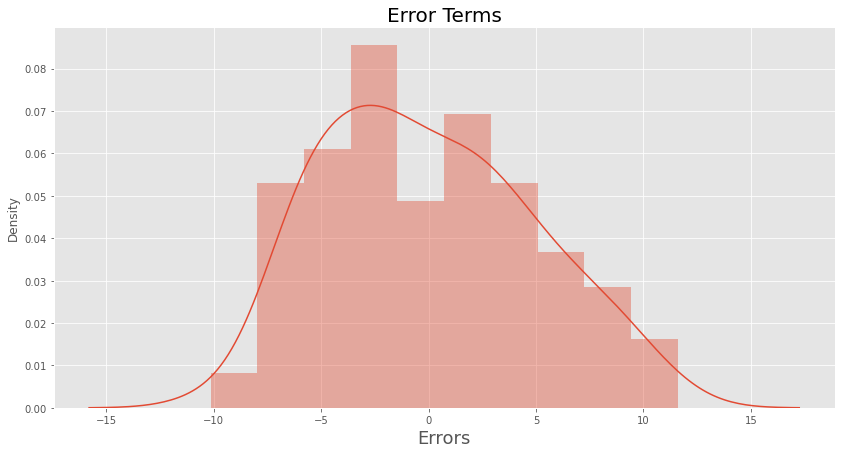

In [364]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((df_analysis_rental.resid), bins = 10)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

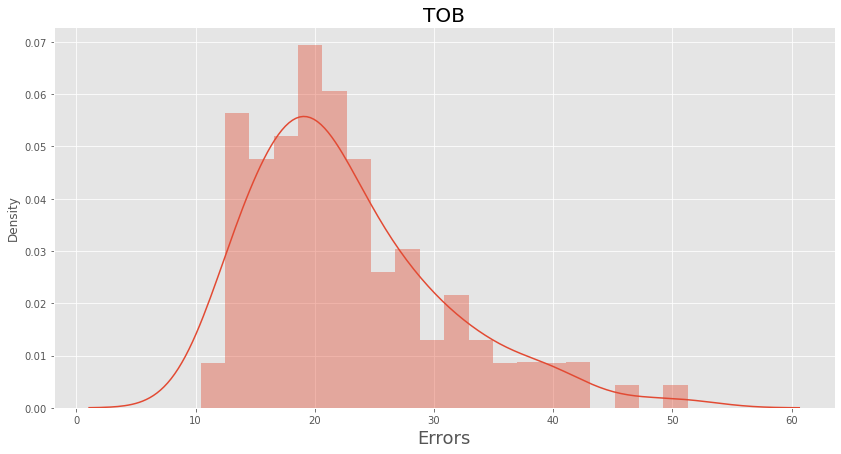

In [360]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((df_analysis.TOB_MINU), bins = 20)
plt.title('TOB', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [2]:
# plot 
plt.figure(figsize=(10,10))
plt.scatter(df_analysis_rental.fittedvalues, df_analysis_rental.resid,cmap='viridis')
# adding title and labels
plt.xlabel('Fitted CRCP')
plt.ylabel('Residual')
#plt.hlines(y = 0, xmin = -1, xmax = 55)
plt.ylim([-10,10.5])
plt.title('Residual vs. Fitted Plot of SDR')
plt.show()

NameError: name 'plt' is not defined

In [225]:
df_analysis_rental.resid

0                                     -10.1449
1                                       2.2496
2                                      -6.3120
3                                      -3.3185
4                                      -0.6498
5                                      -6.5540
6                                      -7.1274
7                                       5.6751
8                                       2.8739
9                                      -6.2656
10                                     -4.7889
11                                     -1.6844
12                                     -3.0623
13                                      1.1388
14                                      4.4476
15                                     -4.0878
16                                     -2.4795
17                                     -0.2380
18                                      2.1028
19                                     -6.6224
20                                      8.0733
21           

In [ ]:
X_values = add_constant(dataset)

In [ ]:
# Residual Analysis
column_names = X_values.columns.values.tolist()
for i in column_names:
    fig = plt.figure(figsize=(12,8))
    fig = sms.graphics.plot_regress_exog(model, i, fig=fig)